## 基于决策树算法的葡萄酒品质预测

## 一、实验简介

### （一）问题描述
随着经济的发展与生活质量的提高，葡萄酒越来越受到大家的欢迎。葡萄酒品质评价大多采用人工感官主观测评的方法。感官评测的影响因素多、主观性比较强，没有统一的参考标准，其重复性差是一个很严重的问题。此外，由于葡萄酒所需的化学成分十分的复杂与多样，比如：非挥发性酸度、残糖、氯化物等，所以对葡萄酒的客观品质划分比较困难。

为了尝试解决这些问题，本实验基于葡萄酒的酸度、氯化物等化学特性，利用Sklearn机器学习库中的决策树对葡萄酒的品质进行预测，并对预测的准确率进行计算。

### （二）问题需求

此实验中的数据集来自UCI上面的公开数据集，数据集包括红酒的品质数据集和白酒的品质数据集，其中红酒数据集共有1599个样本数据，白酒数据集共有4898个样本数据，每个样本都包含相同的12个属性。其中，quality代表葡萄酒质量（评分由低到高，值为0-10的整数），实验中用于决策树模型的标签。数据集中其它字段的意义如下：

|特征名|特征含义|
|---|---|
|fixed acidity|非挥发性酸度|
|volatile acidity|挥发性酸度 （太高的酸度会导致红酒味道变差）|
|citric acid|柠檬酸 （少量的柠檬酸能增加红酒的鲜度）|
|residual sugar|残糖 （酒精发酵后未被发酵而残余的糖分）|
|chlorides|氯化物 （普通酒中的盐分）|
|free sulfur dioxide|游离二氧化硫 （能防止微生物和被氧化）|
|total sulfur dioxide|总二氧化硫量， 包含游离二氧化硫和结合二氧化硫（如果游离二氧化硫浓度超过50 ppm的话，就能从红酒中感受到二氧化硫的味道）|
|density|密度（水的密度，即水减去酒精和糖的容量后计算得到）|
|pH|酸碱度（0 (very acidic酸) to 14 (very basic碱); 大部分集中在3-4的ph值之间）|
|sulphates|硫酸盐（一种会产生二氧化硫添加剂，有抗菌剂和抗氧化剂的作用）|
|alcohol|酒精度|

数据文件所在的位置“决策树\data\winequality-red.csv”，“决策树\data\winequality-white.csv”。

实验中将整个数据集以8:2的比例拆分为训练集与测试集。

本实验将使用葡萄酒品质数据训练集来训练决策树模型，并使用测试集在训练得到的模型上进行验证，最终得到模型的准确率。

## 二、 实验任务与要求
本实验主要任务是应用Sklearn机器学习库中的决策树模块，通过合并红酒和白酒两个数据集，在数据处理后抽取80%的样本作为训练集对决策树模型进行训练，最终使用训练后的模型对其余20%的样本进行分类预测。具体的实验任务如下：

1.数据集的观察：加载数据集，观察数据集的整体情况，大致了解本实验的数据集。

2.合并数据集：将两个数据集进行合并。

3.数据可视化：以直方图的形式分析residual_sugar、pH、alcohol这三个特征对葡萄酒品质的影响。

4.数据集的划分：实验中需要将数据集按8:2的比例划分成训练集和测试集。

5.模型的训练：实现决策树模型，在使用训练集对模型进行训练。

6.模型的评估：利用测试集评估模型分类结果的准确率。

## 三、实验步骤

### （一）加载相关的包

1.加载Numpy、Pandas等包做数据处理。

2.加载Matplotlib包做数据可视化。

3.从sklearn.tree加载DecisionTreeClassifier算法函数

4.从Sklearn.model_selection中加载train_test_split训练集-测试集划分的函数

5.从Sklearn.metrics中加载accuracy_score模块来评估模型

In [1]:
import numpy as np  # 数据处理包
import pandas as pd  # 文件读取包
import matplotlib.pyplot as plt  # 数据可视化包
from sklearn.tree import DecisionTreeClassifier  # 决策树分类模型
from sklearn.model_selection import train_test_split  # 数据划分函数
from sklearn.metrics import accuracy_score  # 精确度，模型评分机制

### （二）数据集的观察

（1）加载数据集。利用pandas中的read_csv()方法来读取csv文件。由于本实验数据集以分号作为分隔符，参数sep里的默认值逗号，需要此参数改为分号。

In [2]:
# 加载数据文件,注意加载数据文件的方式,需要以分号作为分隔符进行分割。
df_redwine = pd.read_csv('data/winequality-red.csv', sep=';')
df_whitewine = pd.read_csv('data/winequality-white.csv', sep=';')

（2）利用pandas中的head()函数分别查看两个dataframe中的前五行数据，直观的了解本实验数据集。

In [3]:
#观察红酒数据样本
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#观察白酒数据样本
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


（3）从上面表格可以观察到，有些特征的命名不规范，为防止后序的使用出现错误，需要利用Pandas下的rename()函数把它重命名。  
命名不规范的特征名有：‘fixed acidity’、‘volatile acidity’、‘citric acid’、‘residual sugar’、‘total sulfur dioxide’、‘free sulfur dioxide’。

In [5]:
#将两个数据集中不规范的命名进行修改
df_redwine.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)
df_redwine.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)
df_redwine.rename(columns={'citric acid': 'citric_acid'}, inplace=True)
df_redwine.rename(columns={'residual sugar': 'residual_sugar'}, inplace=True)
df_redwine.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
df_redwine.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'}, inplace=True)

df_whitewine.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)
df_whitewine.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)
df_whitewine.rename(columns={'citric acid': 'citric_acid'}, inplace=True)
df_whitewine.rename(columns={'residual sugar': 'residual_sugar'}, inplace=True)
df_whitewine.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
df_whitewine.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'}, inplace=True)

（4）利用pandas中的info()函数查看数据集的大小、行列规模和数据类型等，了解数据的整体信息，以便于后续数据处理。

In [6]:
 # 观察红酒数据样本的整体信息
df_redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# 观察白酒数据样本的整体信息
df_whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


可以观察到红葡萄酒的样本共有1599个，白葡萄酒的样本共有4898个，样本数据的数据类型全是数值型，数据集中没有缺失值。

### （三）合并数据集

由于本实验中有两种不同葡萄酒的数据集，同时这两个数据集的特征属性一样，可以创建颜色列将数据集区分，再将两个数据集进行合并，最后利用模型同时对两种葡萄酒数据进行学习。

首先利用Numpy里的重复功能np.repeat(a, repeats, axis=None)创建两个数组，数组长度需要与红白葡萄酒数据集的行数相同。

repeat()函数解释如下：

    功能：可以对数组中的元素进行连续复制。
    
    参数：
        a：数组。
        repeats：表示重复的次数。
        axis：表示数组的维度。

In [8]:
#创建重复值的数组
color_red = np.repeat('red', df_redwine.shape[0])
color_white = np.repeat('white', df_whitewine.shape[0])

再创建新的列名同时将数组添加到红葡萄酒和白葡萄酒数据集中。

In [9]:
#将数组添加到红葡萄酒数据集中
df_redwine['color'] = color_red
df_redwine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [10]:
#将数组添加到白葡萄酒数据集中
df_whitewine['color'] = color_white
df_whitewine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white


最后利用append()函数组合红白葡萄酒数据集。

In [11]:
#合并数据集
df_wine = df_redwine.append(df_whitewine)

/var/folders/3w/772jr2311zsbz371z3v36rdw0000gn/T/ipykernel_68760/1440112917.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_wine = df_redwine.append(df_whitewine)


### （四）数据可视化

在生活当中，对葡萄酒的平衡起着关键性影响的元素包括：甜度、酸度、果味、酒精以及单宁。这些影响元素在数据集中呈现为：
 
    a. residual_sugar：残留糖分较高的葡萄酒，甜度就高，尝起来会有甜腻的口感，但是如果糖分不足会使得葡萄酒变得尖酸干涩难以下咽。  
    b. pH：葡萄酒的pH值，反映的是葡萄酒的酸的强度。pH值越低，酸度越强，呈现出来的口感则越清脆鲜活。  
    c. alcohol：过高的酒精度会给喉咙带来烧灼感。 

本实验将以直方图的形式分析上述元素对葡萄酒品质的影响，具体需要分析以下问题：
    
    a.口感较甜（残糖多）的葡萄酒是否评分更高？
    b.什么水平的酸度（pH 值）代表的葡萄酒品质更好？
    c.酒精含量高的葡萄酒是否品质更好？
    
本节所使用的一些函数的解释如下：   
    
query(expr, inplace=False, **kwargs)函数解释：
    
    使用布尔表达式查询帧的列。
    
    参数：
        
        expr：要评估的表达式字符串。可以在环境中引用局部变量，在它们前面添加一个'@'字符 ，比如@A。
        inplace=False：是否修改数据或返回副本。
        kwargs：dict关键字参数。
        
    返回值：标量或pandas对象，评估结果。

plt.bar(x,height,tick_label)函数所使用的参数解释：

    x：标量序列，表示直方图x坐标位置。
    height：标量或者标量序列，表示直方图的高度。
    tick_label：字符串或者数组，可选参数，表示直方图的tick标记，默认为None。
    

pd.cut(x,bins,labels=None)函数所使用的参数解释：

    x：进行划分的一维数组。
    bins：整数---将x划分为多少个等间距的区间。
        序列---将x划分为多个半开半闭区间，若不在区间中，则是NaN。
    labels : 用标记来代替返回的bins。
 
groupby(by=None)函数所使用的参数解释：

    by：用于确定分组的依据。如果传递了一个dict或Series,则将使用Series或dict的values来确定组；如果传递了一个str或者一个strs列表，可以通过本身的列名进行分组。

口感较甜的葡萄酒是否评分更高？

In [12]:
# 获取残留糖分的中位数
sugar_median = df_wine.residual_sugar.median()


# 选择残留糖分小于中位数的样本
sugar_low = df_wine.query('residual_sugar < @sugar_median')

# 选择残留糖分大于等于中位数的样本
sugar_high = df_wine.query('residual_sugar >= @sugar_median')

# 获取低糖分组和高糖分组的平均质量评分
mean_sugar_low = sugar_low.quality.mean()
mean_sugar_high = sugar_high.quality.mean()

print("低糖分的平均质量：", mean_sugar_low)
print("高糖分的平均质量：", mean_sugar_high)

低糖分的平均质量： 5.808800743724822
高糖分的平均质量： 5.82782874617737


创建残余糖与质量之间的直方图，用一个条柱表示残留糖少的样本的平均质量，另一个条柱表示残留糖多的样本的平均质量。

Text(0, 0.5, '平均质量')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pyl

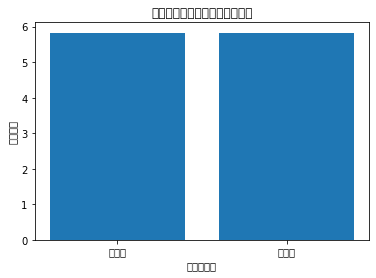

In [13]:
plt.rcParams['font.family'] = 'SimHei'  # 设置字体序列为简黑，解决plt中中文显示问题。

locations = [1, 2]  # 定义条柱的 x 坐标位置
sugar_heights = [mean_sugar_low, mean_sugar_high]  # 定义条柱的高度
sugar_labels = ['低糖分', '高糖分']
plt.bar(locations, sugar_heights, tick_label=sugar_labels)  # 绘画直方图
plt.title('不同残余糖含量等级的平均质量')  # 设置标题
plt.xlabel('残余糖含量')  # 设置x轴名称
plt.ylabel('平均质量')  # 设置y轴名称

什么水平的酸度代表的葡萄酒品质更好？

In [14]:
# 用 Pandas 描述功能查看最小、25%、50%、75% 和 最大 pH 值
df_wine.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [15]:
'''设置置酸度的水平，用刚才计算的五个值填充这个列表，由于划分的是半开半闭区间，
为了防止最小值为None，需要将最小值减去0.1'''
bin_edges = [2.72-0.1, 3.11, 3.21, 3.32, 4.01]

In [16]:
# 四个酸度水平组的标签
bin_names = [ "high", "median_high", "mediam", "low"] # 对每个酸度水平类别进行命名

In [17]:
# 创建 acidity_levels 列
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)

# 检查该列是否成功创建
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,median_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mediam
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,median_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [18]:
# 用 groupby 计算每个酸度水平的平均质量
df_groups = df_wine.groupby("acidity_levels")['quality'].mean()
df_groups

acidity_levels
high           5.783469
median_high    5.784540
mediam         5.850832
low            5.859593
Name: quality, dtype: float64

创建pH值与质量之间的直方图，四个酸度水平分别用一个条柱表示。

Text(0.5, 1.0, '不同酸度等级的平均质量')

/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37240 (\N{CJK UNIFIED IDEOGRAPH-9178}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49})

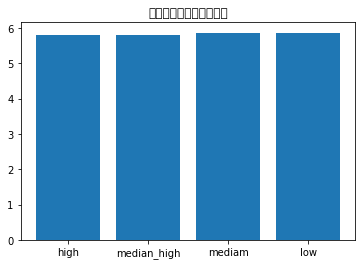

In [19]:
#创建一个不同酸度水平的平均质量列表，用于设置条柱的高度
df_groups = [df_groups['high'], df_groups['median_high'],
             df_groups['mediam'], df_groups['low']]

locs = [1, 2, 3, 4]
levels = ['high', 'median_high', 'mediam', 'low']
plt.bar(locs, df_groups, tick_label=levels)# 绘制直方图
plt.title('不同酸度等级的平均质量')

酒精含量高的葡萄酒是否品质更好？

In [20]:
# 用查询功能选择每个组，并获取其平均质量

# 获取酒精含量的中位数
alcohol_median = df_wine['alcohol'].median()

# 通过中位数将葡萄酒样本分为酒精含量低和酒精含量高的样本
low = df_wine.query('alcohol<{}'.format(alcohol_median))
high = df_wine.query('alcohol>={}'.format(alcohol_median))

#获取低酒精度分组和高酒精度分组的平均质量评分
mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

print("酒精含量低的质量：", mean_quality_low)
print("酒精含量高的质量：", mean_quality_high)

酒精含量低的质量： 5.475920679886686
酒精含量高的质量： 6.146084337349397


创建酒精含量与质量之间的直方图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。

Text(0, 0.5, '平均质量')

/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37202 (\N{CJK UNIFIED IDEOGRAPH-9152}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21547 (\N{CJK UNIFIED IDEOGRAPH-542B})

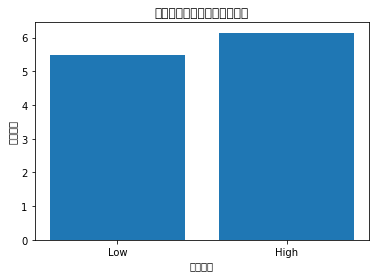

In [21]:
# 用合适的标签创建柱状图
locations = [1, 2] # 定义条柱的 x 坐标位置
heights = [mean_quality_low, mean_quality_high] #设置条柱的高度
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)# 绘画直方图
plt.title('不同酒精含量等级的平均质量')
plt.xlabel('酒精含量')
plt.ylabel('平均质量')

通过观察上面的三幅直方图可以得知：高糖分的酒质量评分更高；酸度越低，质量评分就越高；高浓度酒精的质量评分更高。

In [22]:
# 进行值替换，将新创建的特征color和acidity_levels的值用数字替换
df_wine.color.replace(to_replace=dict(red=1, white=2), inplace=True)
df_wine.acidity_levels.replace(to_replace=dict(high=1, median_high=2, mediam=3, low=4), inplace=True)

In [23]:
#查看特征的值是否替换
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,4


### （五）数据处理
本实验中，由于quality是标签，需要把它单独取出来做成标签列，采用Pandas中取某一列的方法取出标签列数据。

In [24]:
y = df_wine["quality"]#获取标签列

提取出标签列后，需要利用pandas下的drop（列名，axis=1指定为列，inplace=是否替换原来的内容）函数将标签列删除。

In [25]:
X = df_wine.drop(['quality'],axis=1)# 删除标签列

由于概率模型（树形模型）不关心变量的值，而是关心变量的分布和变量之间的条件概率，所以在使用决策树之前无需做数据标准化，可以直接将数据集划分。

### （六）数据集的划分  
数据集的划分需要利用Sklearn.preprocess模块下的train_test_split(X,y，test_size=0.2)函数，把数据集分为训练集和测试集。

In [26]:
#划分数据集
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((5197, 13), (5197,), (1300, 13), (1300,))

### （七）模型的训练、应用和评估

决策树是一个树结构。使用决策树进行决策的过程中，需要从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。决策树模型常常用来解决分类和回归问题，但是它忽略数据集中属性之间的相关性，容易出现过拟合。

决策树算法的具体实现步骤如下：

1.实例化sklearn.tree里的DecisionTreeClassifier()算法模块。

2.利用DecisionTreeClassifier().fit(train_X,train_y)函数对训练集数据进行拟合。

3.利用model_tree.predict(test_X)函数对测试集数据进行预测。

4.利用sklearn.metrics里的accuracy_score()进行评分。

DecisionTreeClassifier()函数几个重要的参数解释：
    
    criterion:gini(基尼系数) 或者 entropy(信息熵)，默认为“gini”。

    max_depth:决策树的深度（层数），太少会欠拟合，太多会过拟合，默认None。

    min_samples_split:节点样本最小值，小于这个值就不会继续划分了，如果样本数量很大，请酌情增大这个参数，默认为2。

    min_samples_leaf:叶子的样本最小值，如果小于这个值就会被剪枝，样本量很大的话酌情增大。(样本是10万，那么叶子样本#数量可以达到10，如果样本数量100万，那么叶子样本可以达到50或者100，大概是1：10000或者1：20000的比例)，默认为1。  

    max_features:设置特征个数来进行分类，按照criterion分裂，如果已经使用了这个数量的特征，剩下的特征就不会再分裂(通常特征数量超过250个，那么我们或启用1：2或者1：3的数量来限制它的最大特征数)，默认None。

    max_leaf_nodes:最大叶子点，防止过拟合，特征比较多请考虑限制叶子的数量，默认None。

    min_impurity_split:阈值，也可以理解为分裂时需要的不纯度(信息增益/比/基尼系数)，过小会导致过拟合，过大会欠拟合或者无法分类，默认None。
    
    class_weight：设置类别的权重，如果没有给出每个类别的权重，则每个类别的权重都为1。

accuracy_score()函数所使用的参数解释：

    y_true: 测试样本标签；
    y_pred: 预测结果。
本实验中将对DecisionTreeClassifier()函数的参数criterion取“gini”和“entropy”这两个分裂节点时评价准则，以比较不同决策方式对算法准确率的影响。实例化一个模型后先用训练集数据进行训练，然后测试集数据进行测试，最后利用accuracy_score()函数评估模型的准确率。分类的准确率分数是指所有分类正确的样本占所有分类样本的百分比。

In [27]:
# 实例化算法DecisionTreeClassifier()
model_tree1 = DecisionTreeClassifier(max_depth=20,min_samples_split=3)
model_tree2 = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_split=3)
# 训练模型
model_tree1.fit(train_X,train_y)
model_tree2.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=3)

In [28]:
# 用测试集测试得到预测标签
preds1 = model_tree1.predict(test_X)
preds2 = model_tree2.predict(test_X)

In [29]:
# 评分
print('参数criterion为gini的准确率：',accuracy_score(preds1,test_y))
print('参数criterion为entropy的准确率：',accuracy_score(preds2,test_y))

参数criterion为gini的准确率： 0.5907692307692308
参数criterion为entropy的准确率： 0.59


## 五、结果分析

本实验采用了葡萄酒品质数据集，将葡萄酒品质预测作为一个分类任务，利用决策树对此数据集进行分类预测。 实验过程包括数据集的加载、数据集的合并、数据可视化、数据的处理、数据集的划分、模型训练与预测。

本实验最终以两种不同决策方式的决策树算法进行训练和测试，准确度在0.5至0.7之间。在决策树分类算法中，信息熵对不纯度更加敏感，对不纯度的惩罚最强，但是在实际使用中，信息熵和基尼系数的效果基本相同。基尼系数比信息熵的计算速度快，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易过拟合。反之，基尼系数在这种情况下效果往往比较好，当然这不是绝对的。

1.尝试利用决策树对一些回归任务的数据集进行学习和预测。

2.尝试自学AutoML(自动机器学习)的相关知识，并利用AutoML对葡萄酒品质数据进行分类预测。

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
X = load_iris().data
y = load_iris().target
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


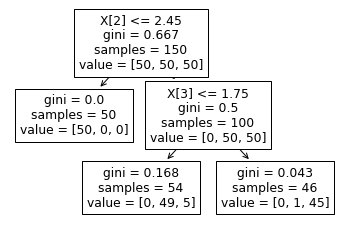

In [40]:
tree.plot_tree(model)